In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

df = pd.read_csv('diabetes_prediccion_normalizado.csv')

In [10]:
import matplotlib.pyplot as plt

accuracy_train_l = []
accuracy_test_l = []

def graficar_presicion(L, train_l, test_l):
    title_L_value = L
    iters = len(test_l)
    fmt_train = {
        'color': 'tab:green',
        'ls': 'solid',
        'lw': 3
    }

    fmt_test = {
        'color': 'tab:pink',
        'ls': 'solid',
        'lw': 3
    }

    fig, (ax) = plt.subplots(1,1,figsize=(10,8))

    ax.plot(train_l, label='Train', **fmt_train)
    ax.plot(test_l, label='Test', **fmt_test)

    ax.grid(which='both')
    ax.legend()
    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()
    plt.savefig(f'accuracy_L_{title_L_value}_iters_{iters}.png')

In [11]:
def redNeuronal(L, iteraciones):
  X = df.drop(columns=['diabetes']).values
  y = df['diabetes'].values.reshape(-1, 1)

  XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=1/3, random_state=42)
  XTrain = XTrain.T
  XTest = XTest.T
  yTrain = yTrain.T
  yTest = yTest.T

  n = XTrain.shape[0]
  nHidden = 6
  nOutputs = 1

  np.random.seed(50)

  WHidden = np.random.randn(nHidden, n)
  bHidden = np.random.randn(nHidden, 1)

  WOutput = np.random.randn(nOutputs, nHidden)
  bOutput = np.random.randn(nOutputs, 1)

  relu = lambda x: np.maximum(x, 0) #Para la capa oculta
  logistic = lambda x: 1 / (1 + np.exp(-x)) #Para la capa de salida

  reluDerivada = lambda x: x > 0
  logisticDerivada = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

  def forwardProp(X): # Forward propagation con una capa oculta y una capa de salida
      Z1 = WHidden @ X + bHidden
      A1 = relu(Z1)
      Z2 = WOutput @ A1 + bOutput
      A2 = logistic(Z2)
      return Z1, A1, Z2, A2

  def backwardProp(Z1, A1, Z2, A2, X, Y):
      dC_dA2 = 2 * A2 - 2 * Y
      dA2_dZ2 = logisticDerivada(Z2)
      dZ2_dA1 = WOutput
      dZ2_dW2 = A1
      dZ2_dB2 = 1
      dA1_dZ1 = reluDerivada(Z1)
      dZ1_dW1 = X
      dZ1_dB1 = 1

      dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

      dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

      dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

      dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

      dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

      return dC_dW1, dC_dB1, dC_dW2, dC_dB2


  accuracy_train_l = []
  accuracy_test_l = []


  for i in tqdm(range(iteraciones)):

      idx = np.random.choice(n, 1, replace=False)
      X_sample = XTrain[:, idx]
      Y_sample = yTrain[:, idx]

      Z1, A1, Z2, A2 = forwardProp(X_sample)

      dW1, dB1, dW2, dB2 = backwardProp(Z1, A1, Z2, A2, X_sample, Y_sample)

      WHidden -= L * dW1
      bHidden -= L * dB1
      WOutput -= L * dW2
      bOutput -= L * dB2

      entrenamientoPredicciones = forwardProp(XTrain)[3]
      prediccionesEntrenamientoProcesadas = (entrenamientoPredicciones >= 0.5).flatten().astype(int)
      datosRealesEntrenamientoProcesados = yTrain.flatten().astype(int)
      comparacionEntrenamiento = np.equal(prediccionesEntrenamientoProcesadas, datosRealesEntrenamientoProcesados)
      precisionEntrenamiento = np.sum(comparacionEntrenamiento.astype(int)) / yTrain.size
      accuracy_train_l.append(precisionEntrenamiento)

      testeoPredicciones = forwardProp(XTest)[3]
      prediccionesProcesadas = (testeoPredicciones >= 0.5).flatten().astype(int)
      datosRealesProcesados = yTest.flatten().astype(int)
      comparacionTesteo = np.equal(prediccionesProcesadas, datosRealesProcesados)
      precisionTesteo = np.sum(comparacionTesteo.astype(int)) / yTest.size
      accuracy_test_l.append(precisionTesteo)

  graficar_presicion(L=L, train_l=accuracy_train_l,test_l=accuracy_test_l)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-10-7024e6956e1a>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax) = plt.subplots(1,1,figsize=(10,8))


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

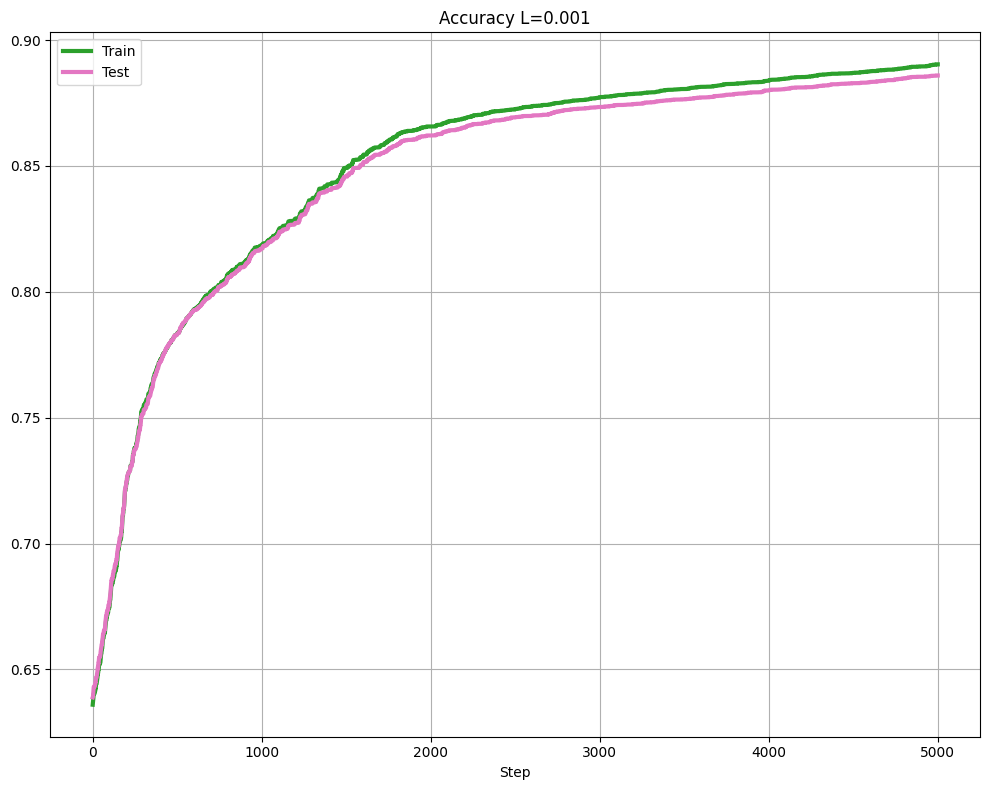

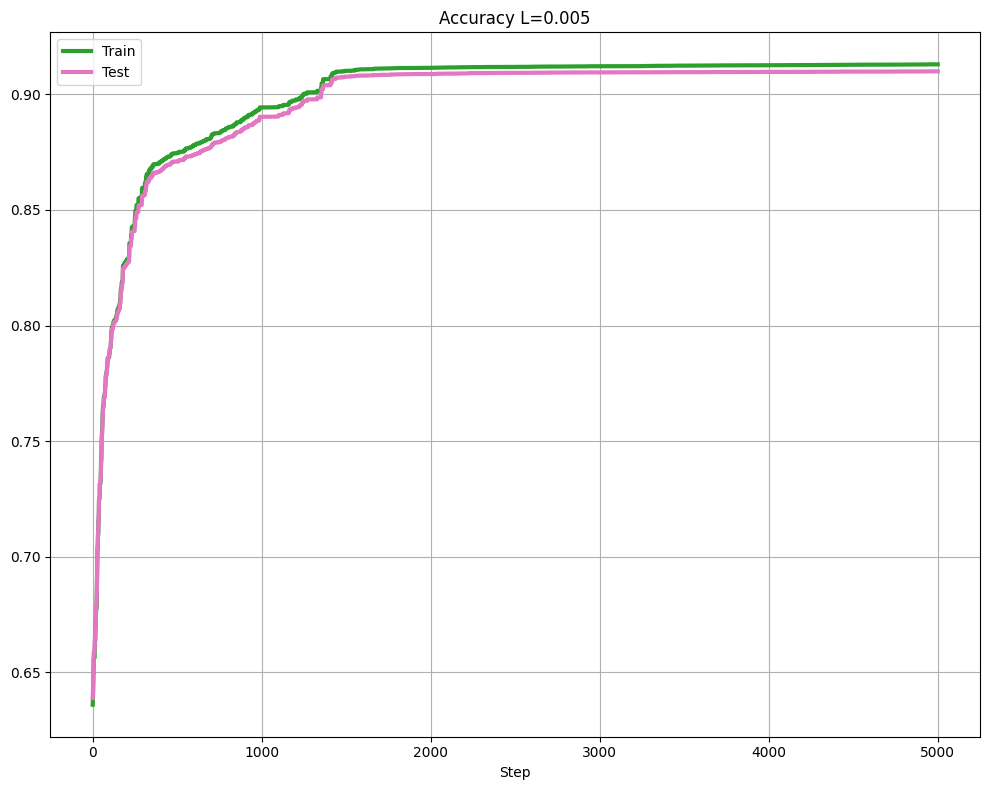

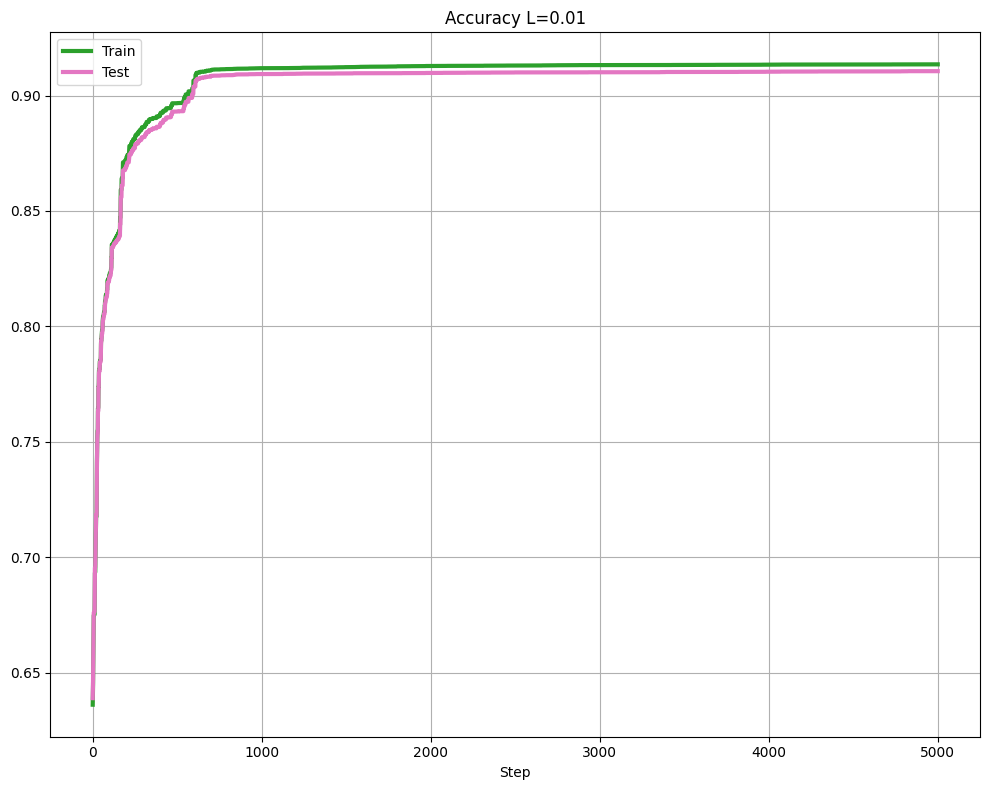

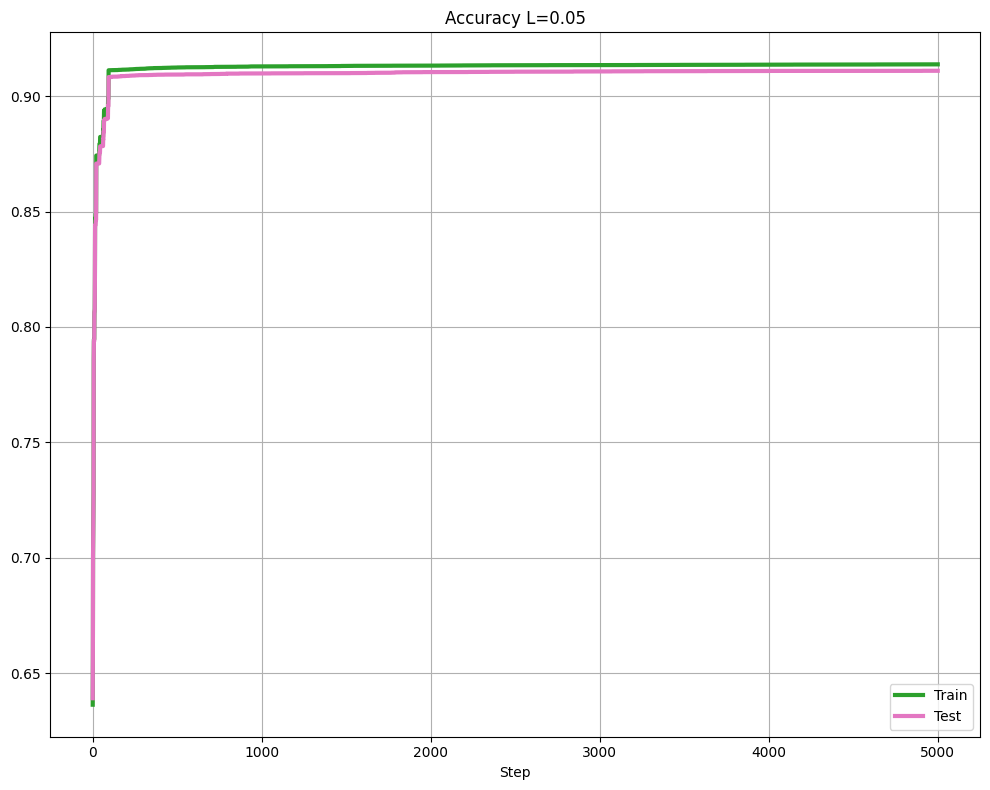

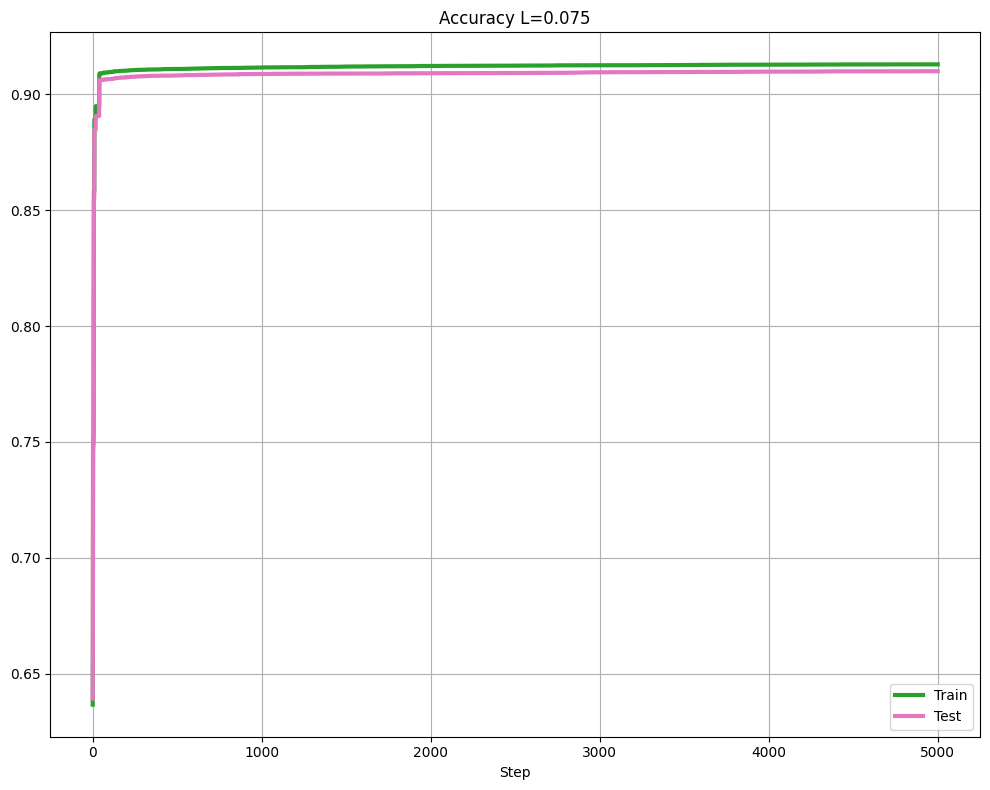

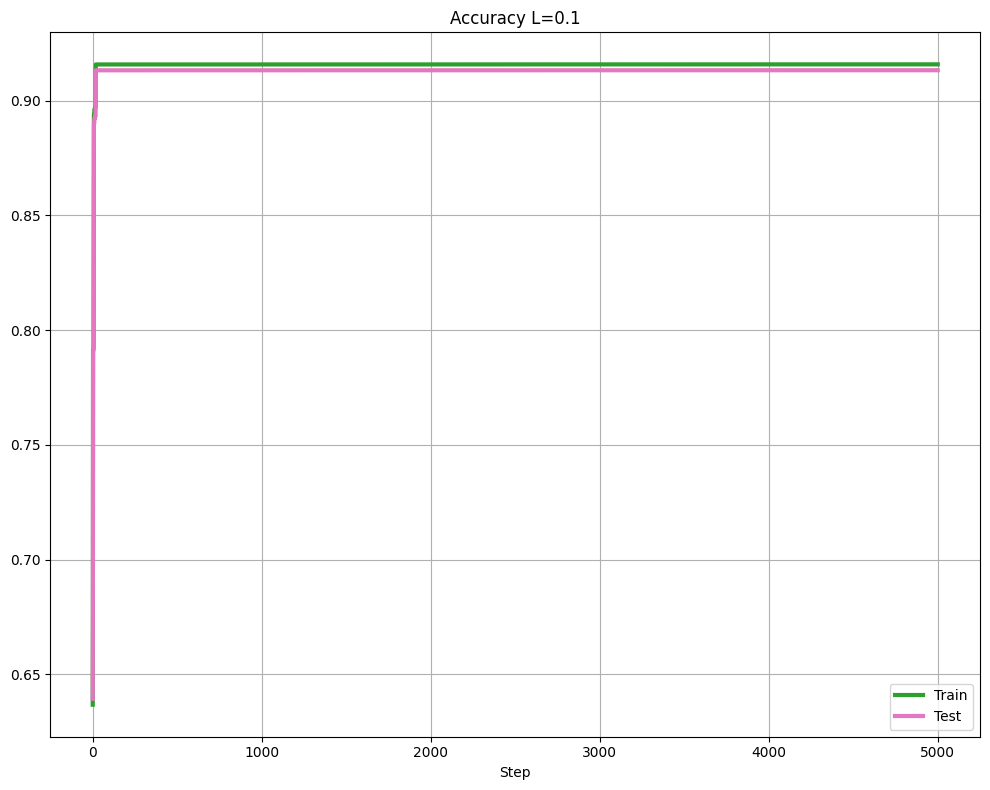

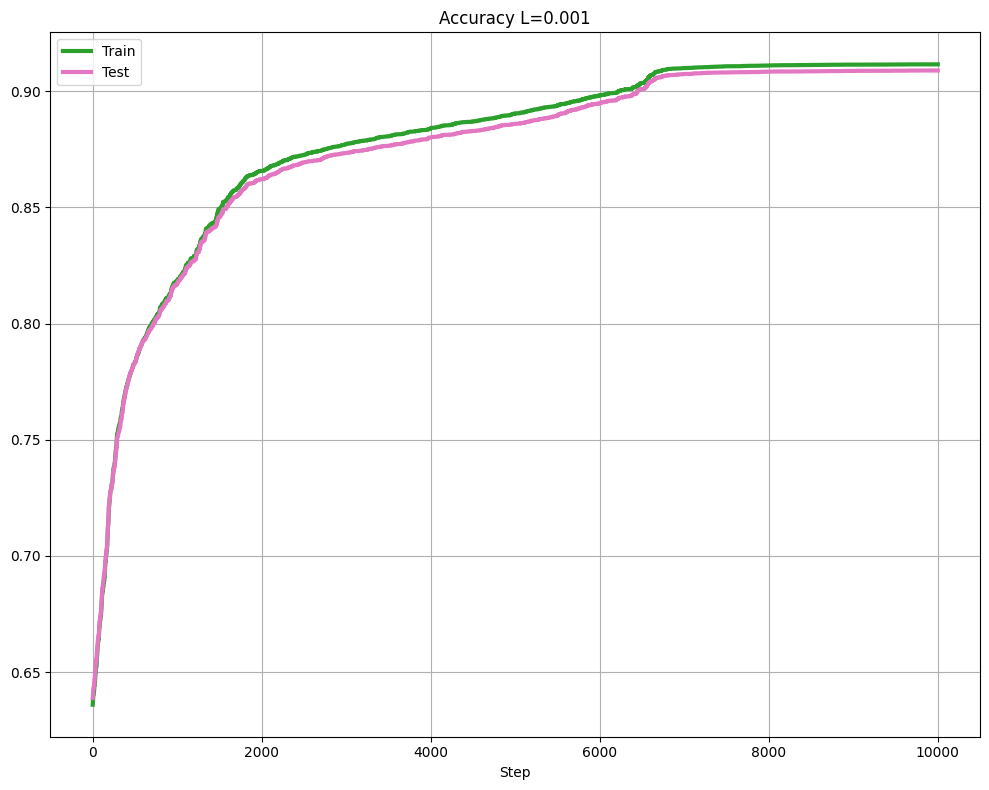

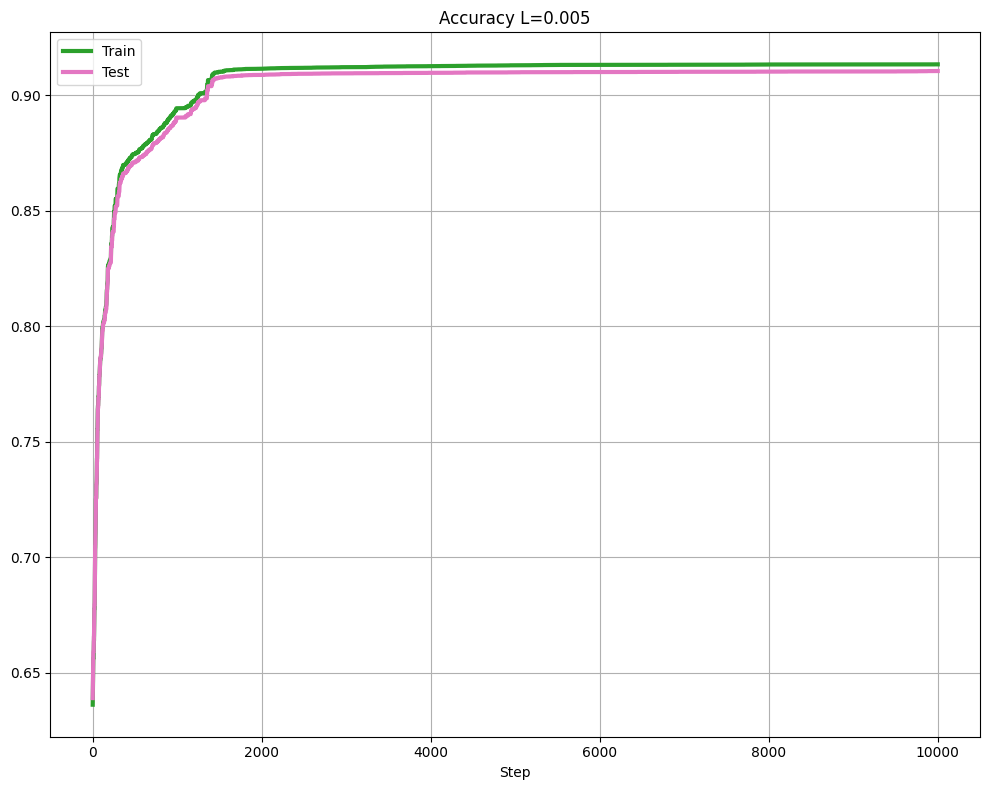

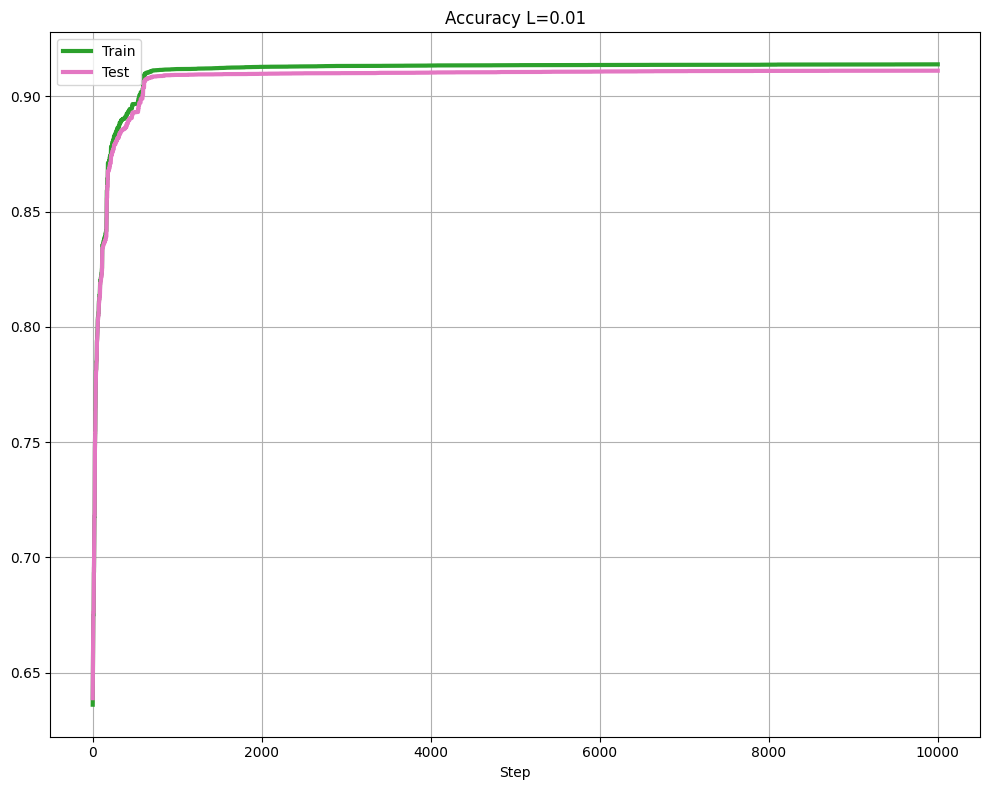

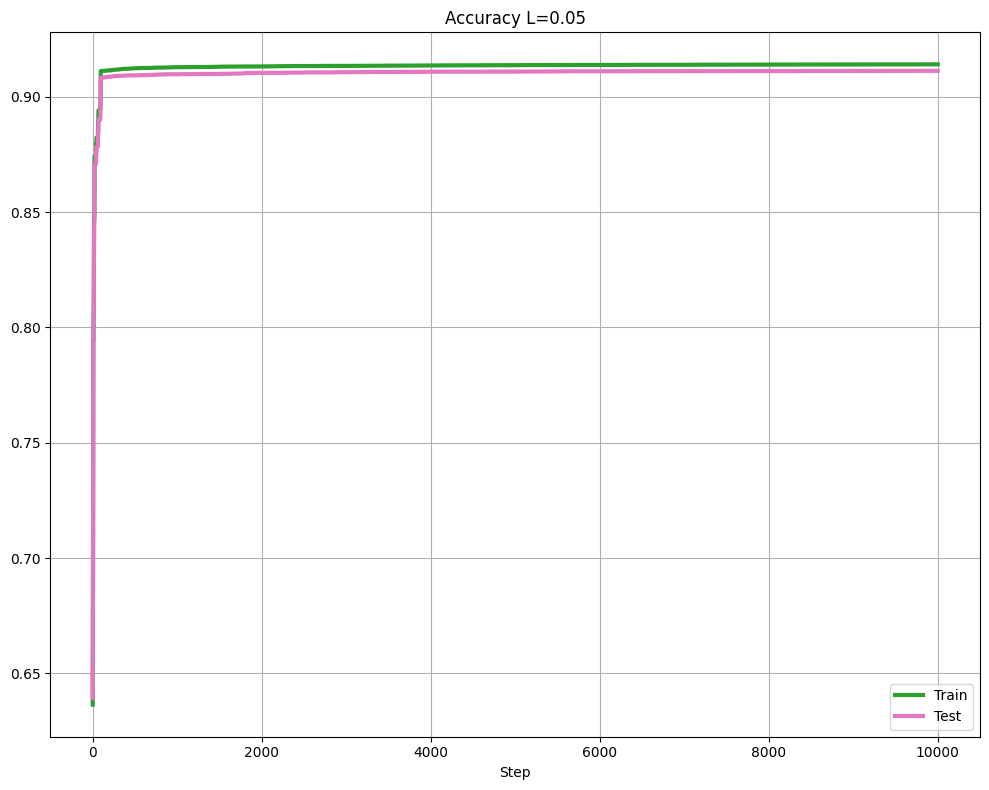

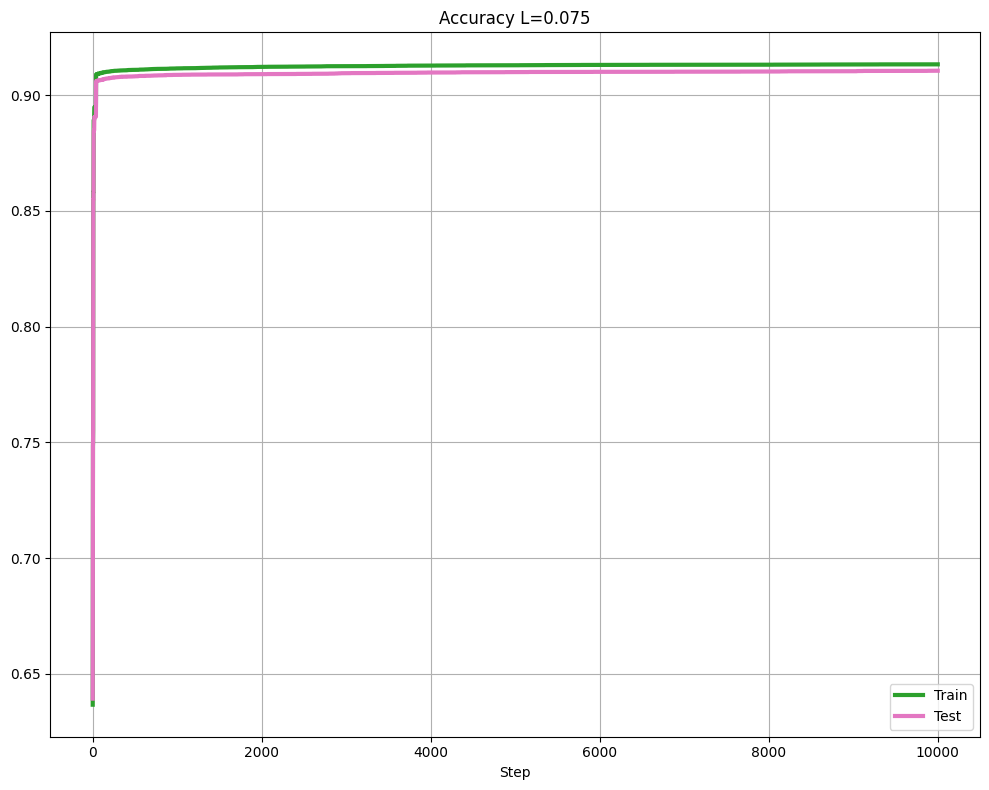

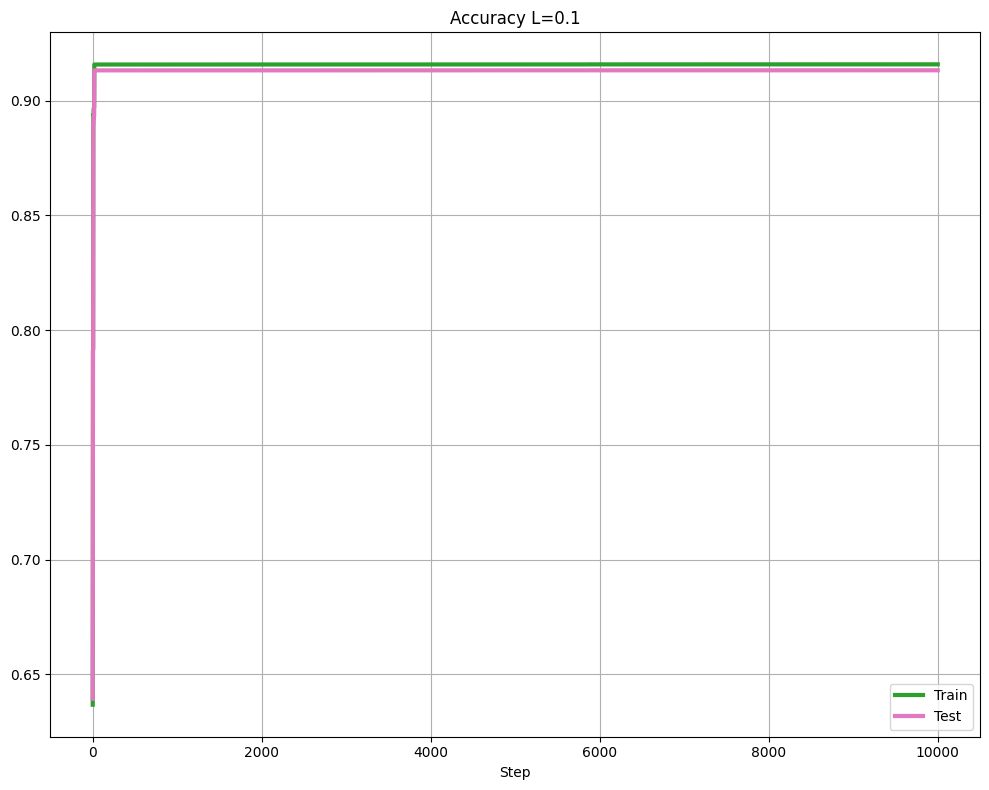

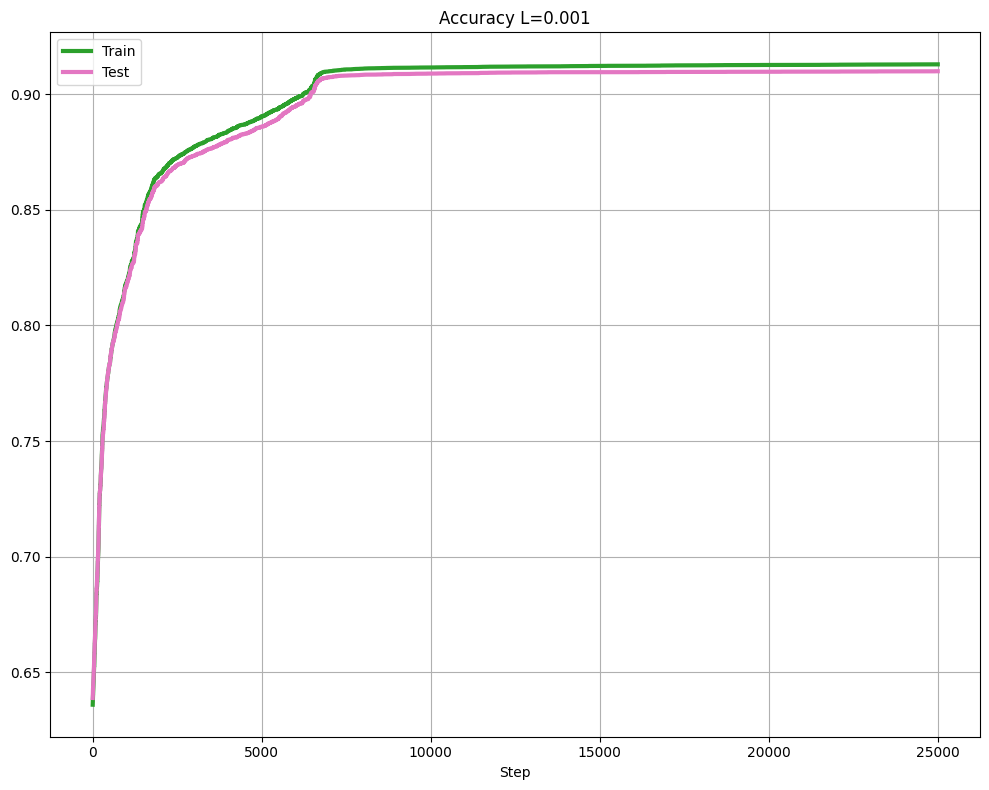

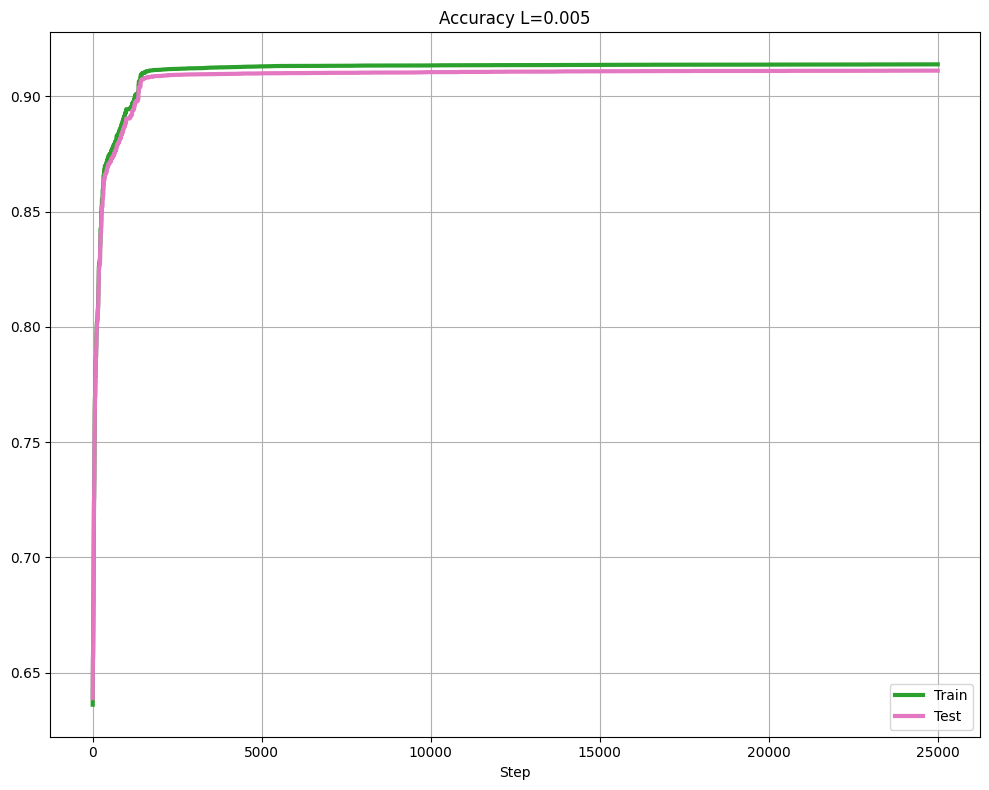

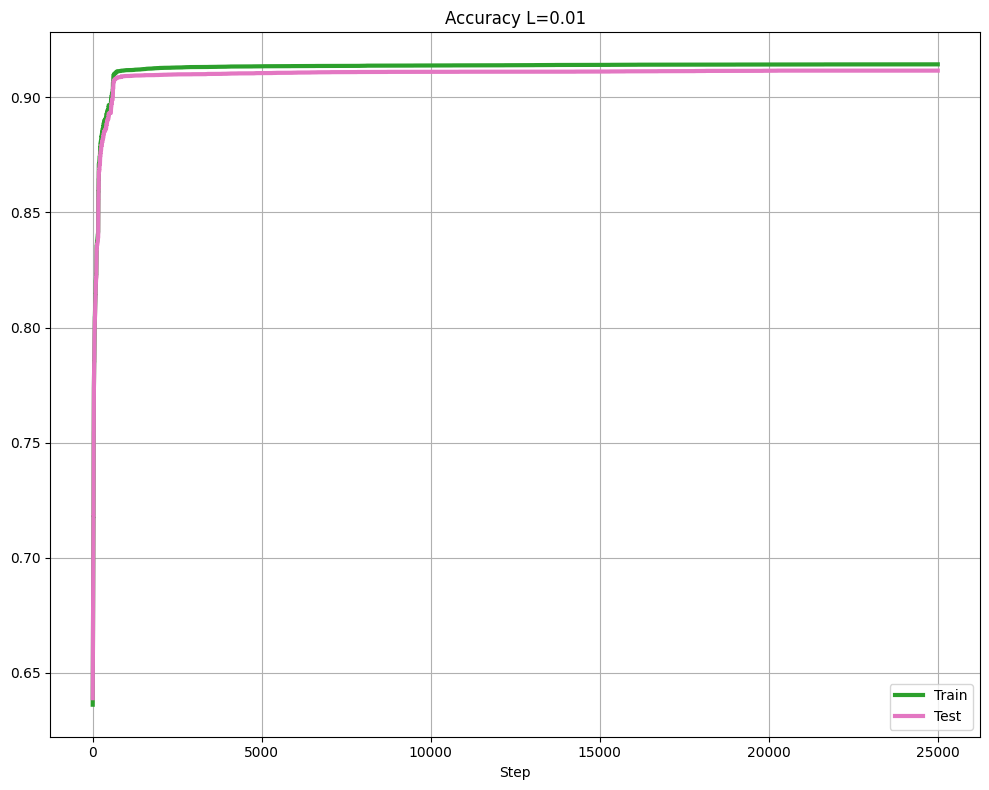

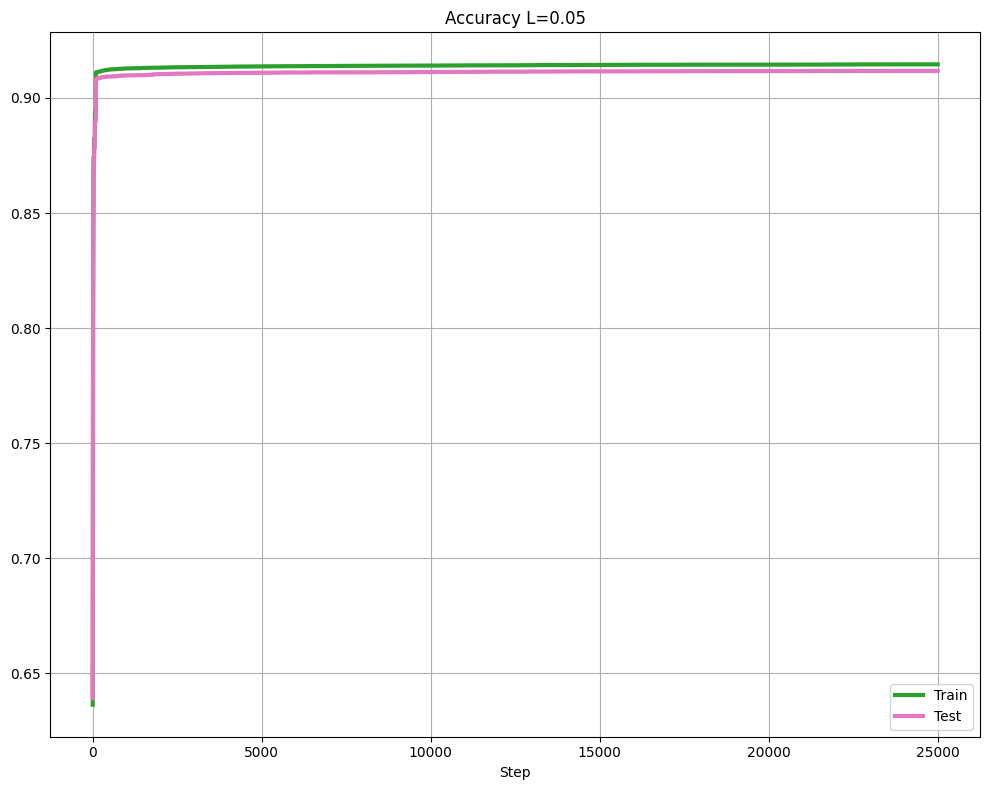

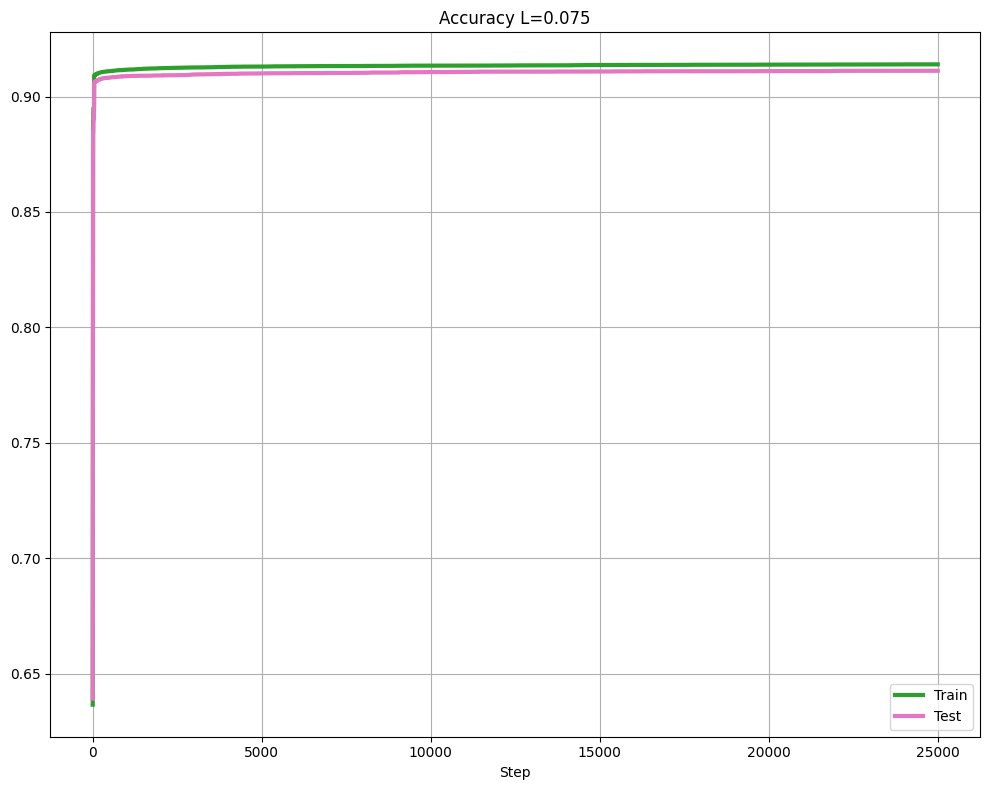

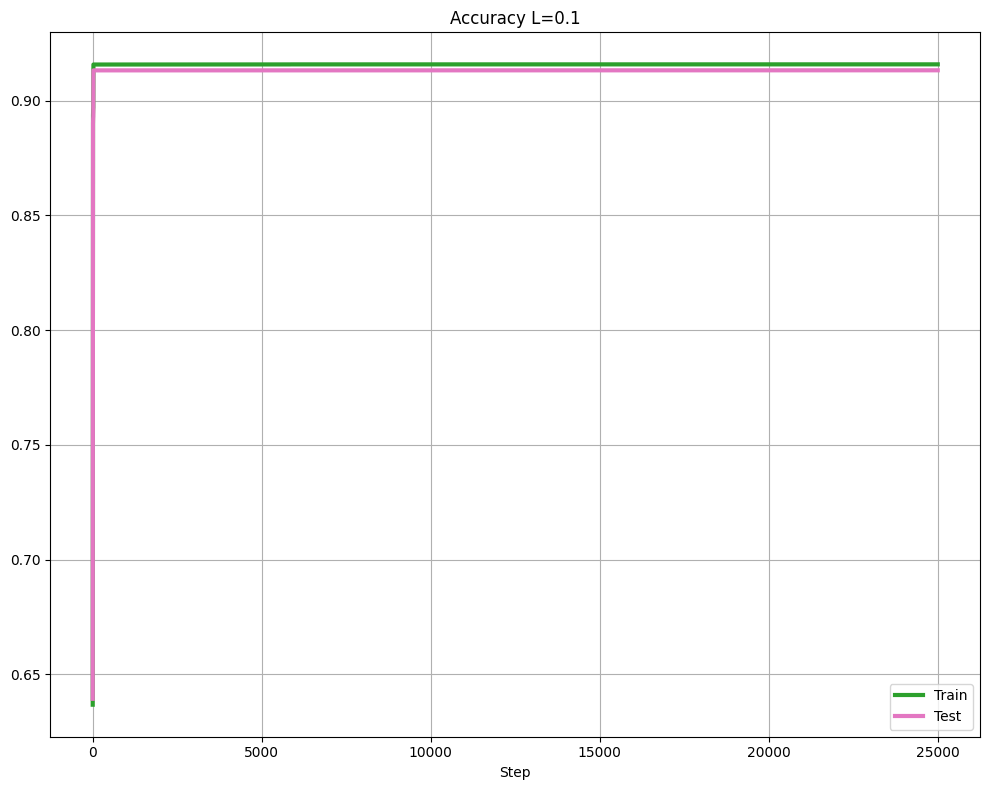

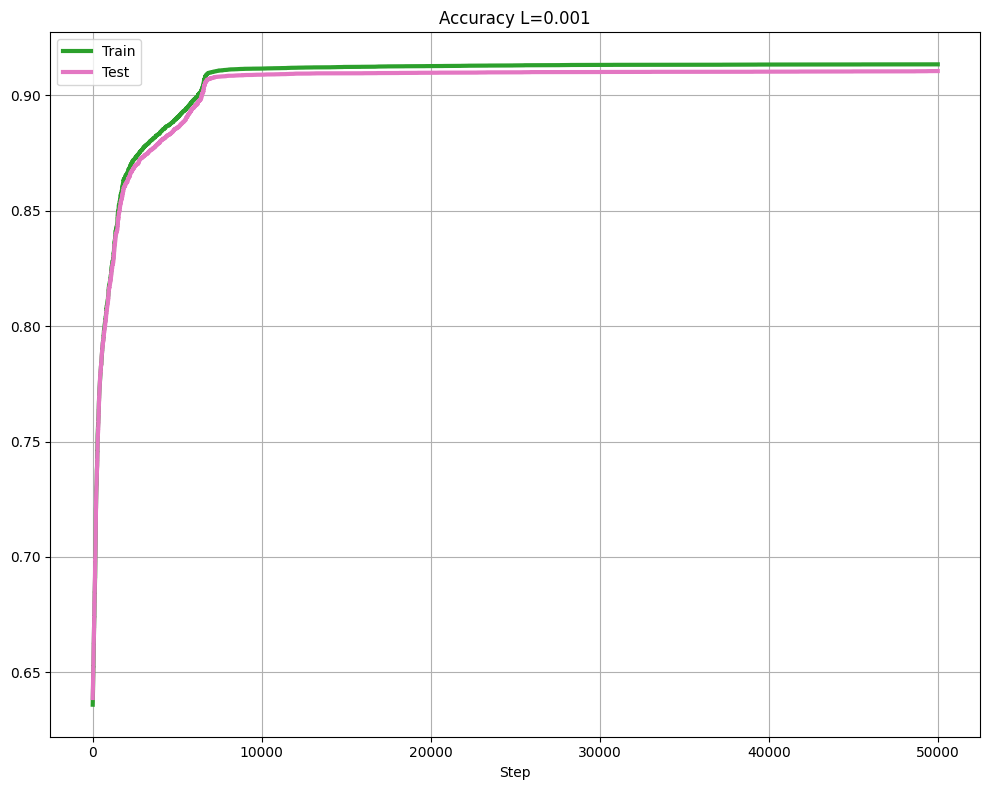

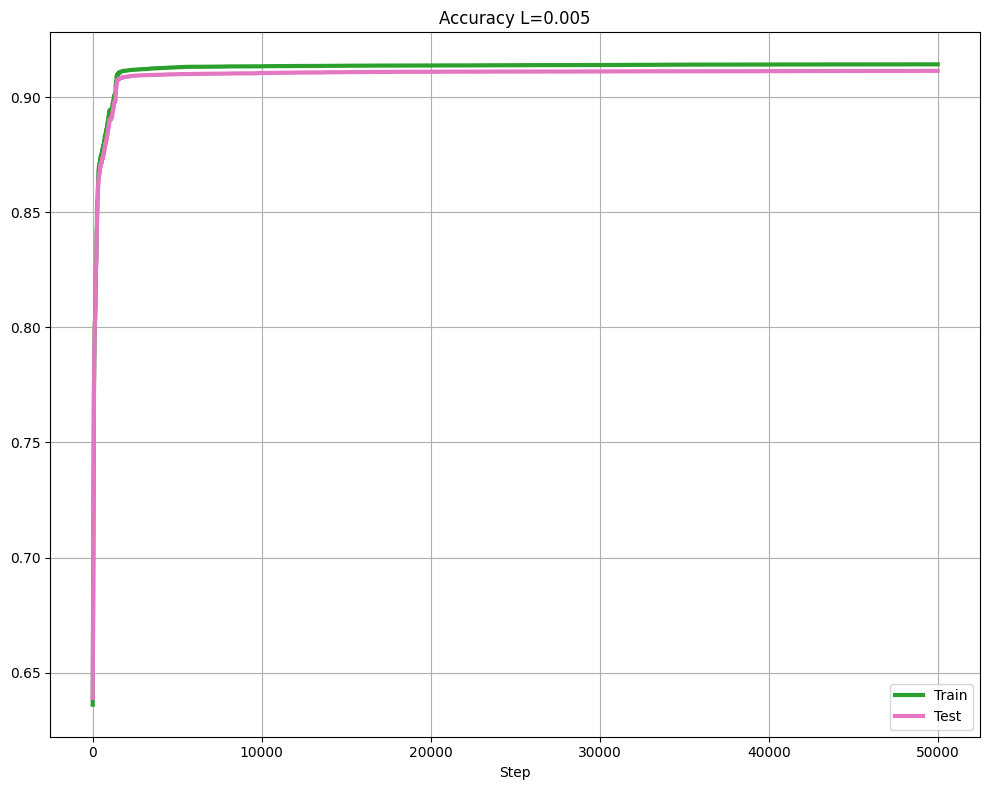

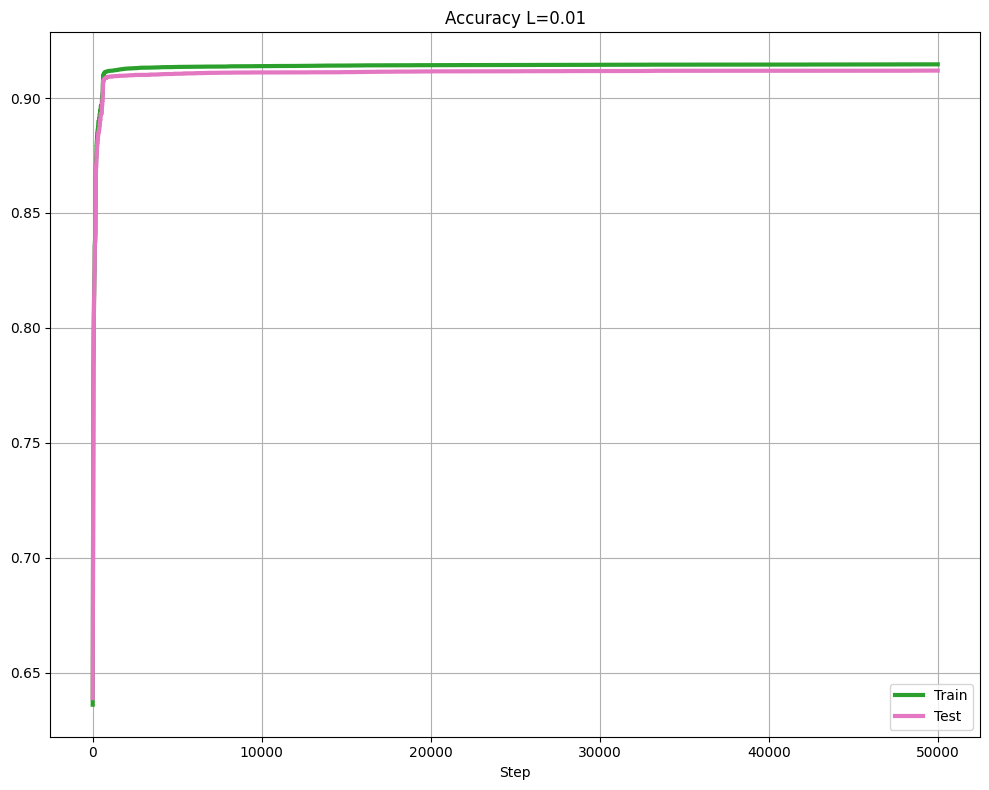

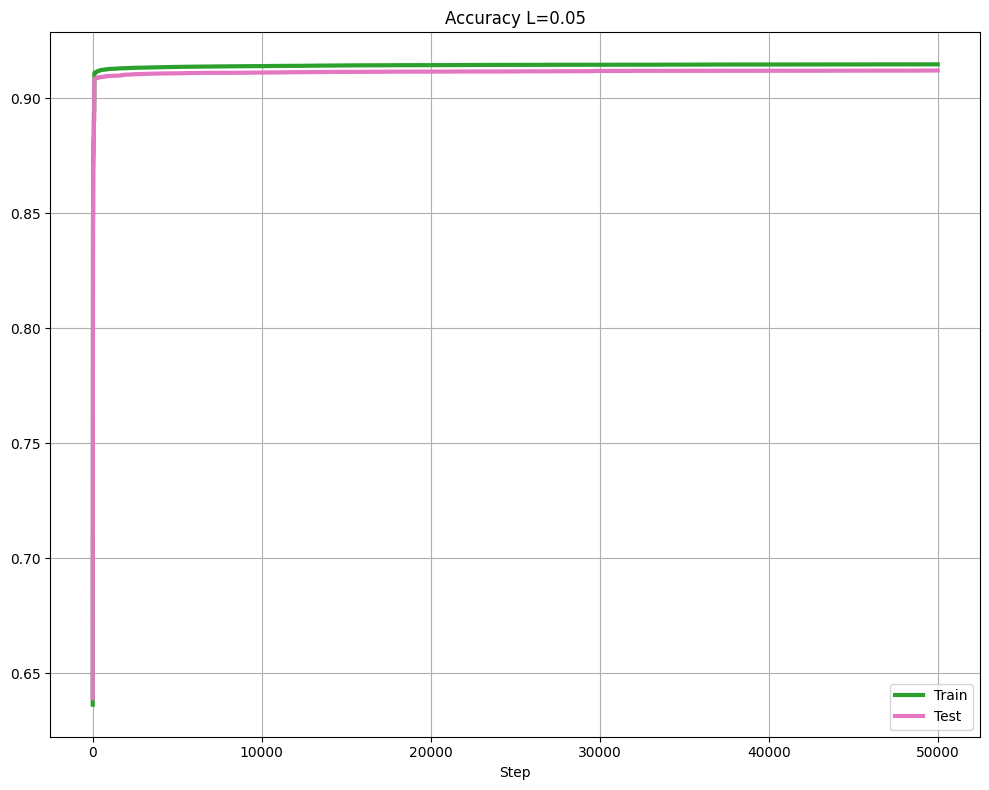

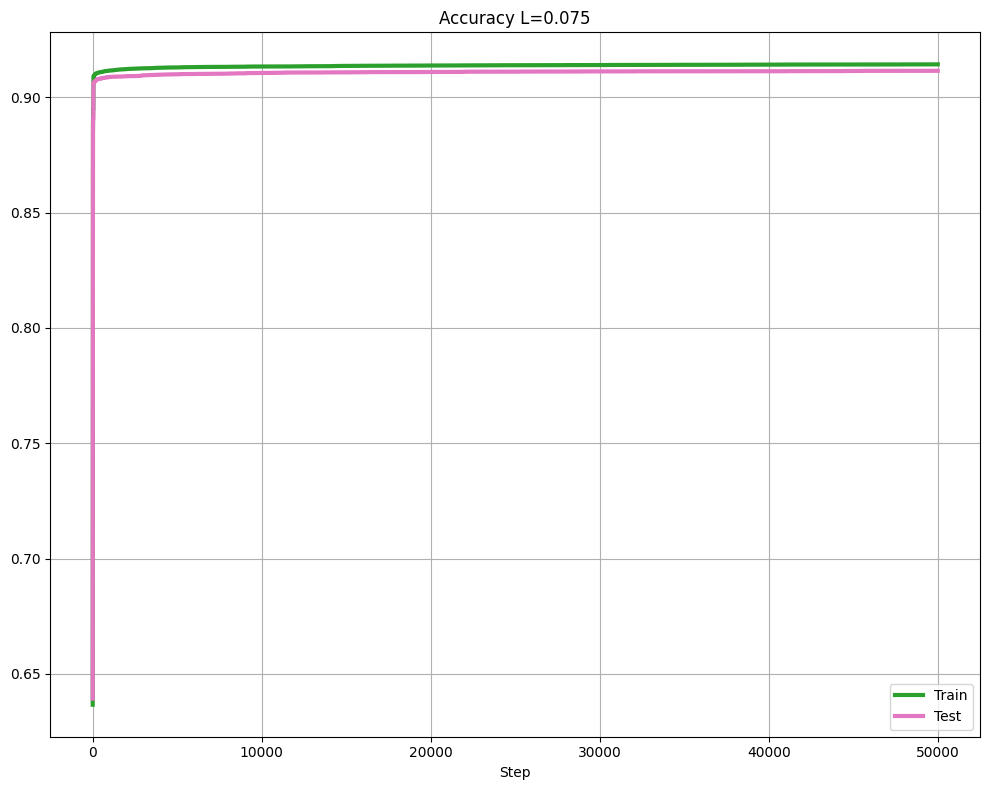

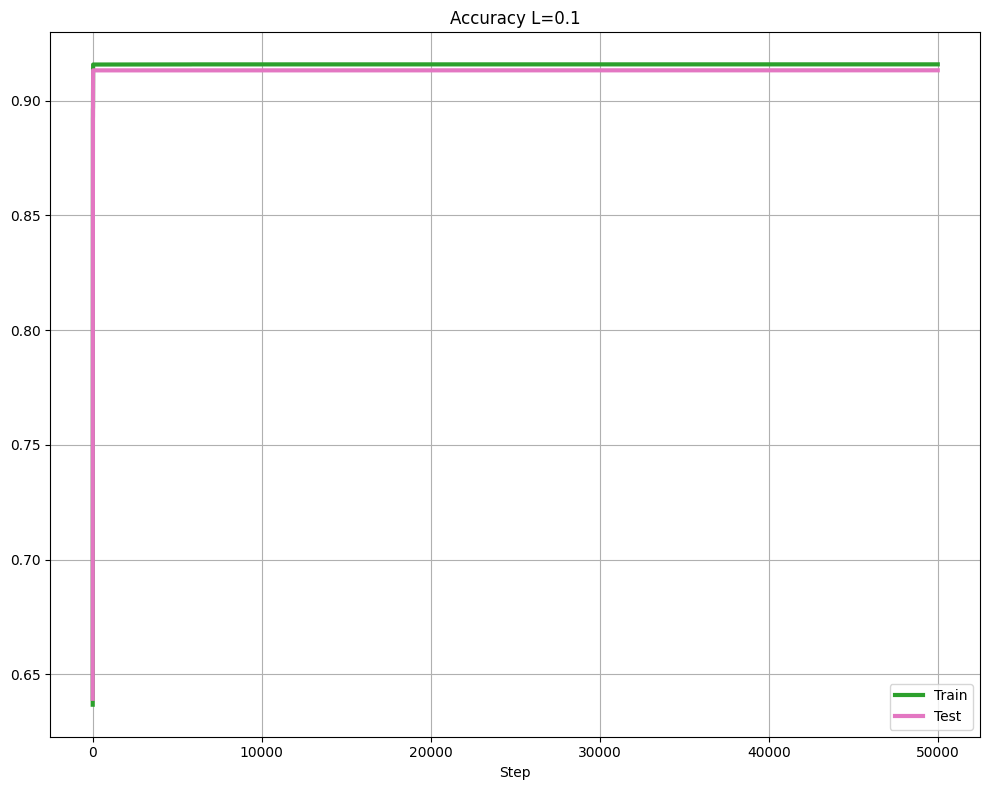

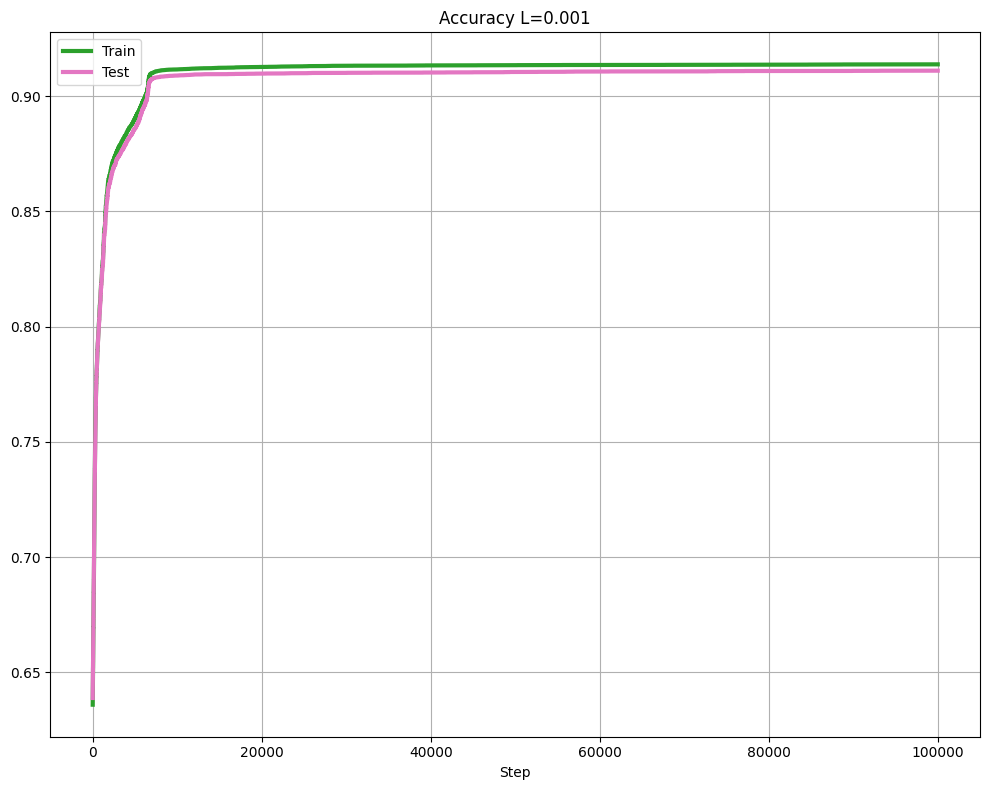

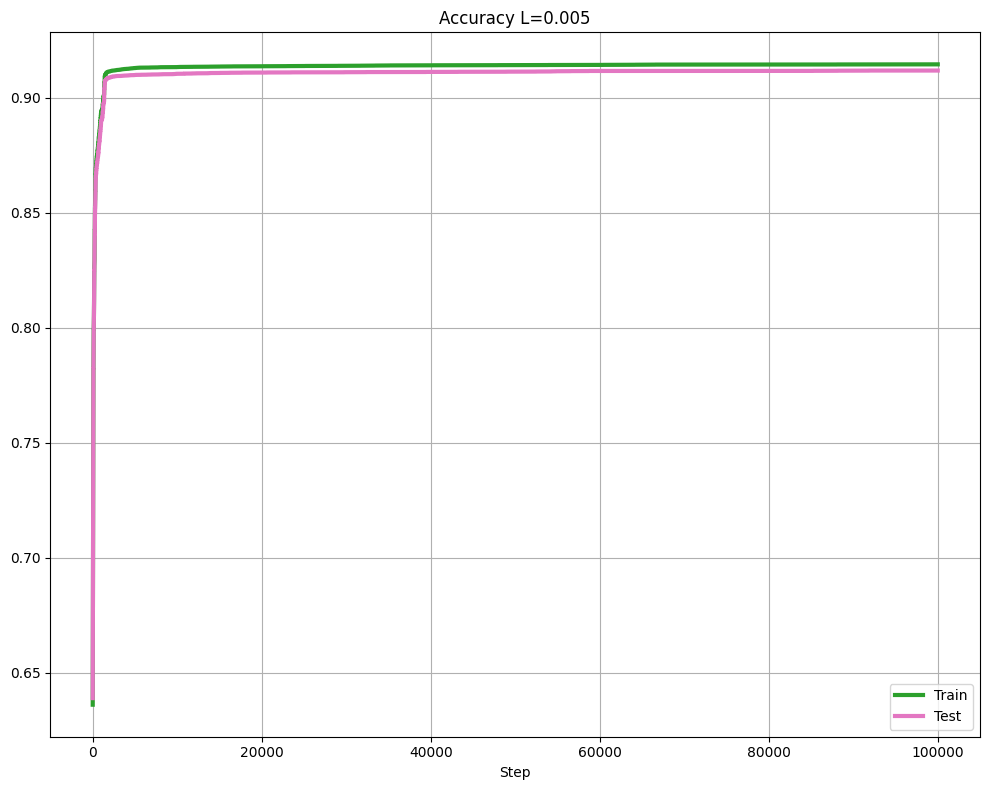

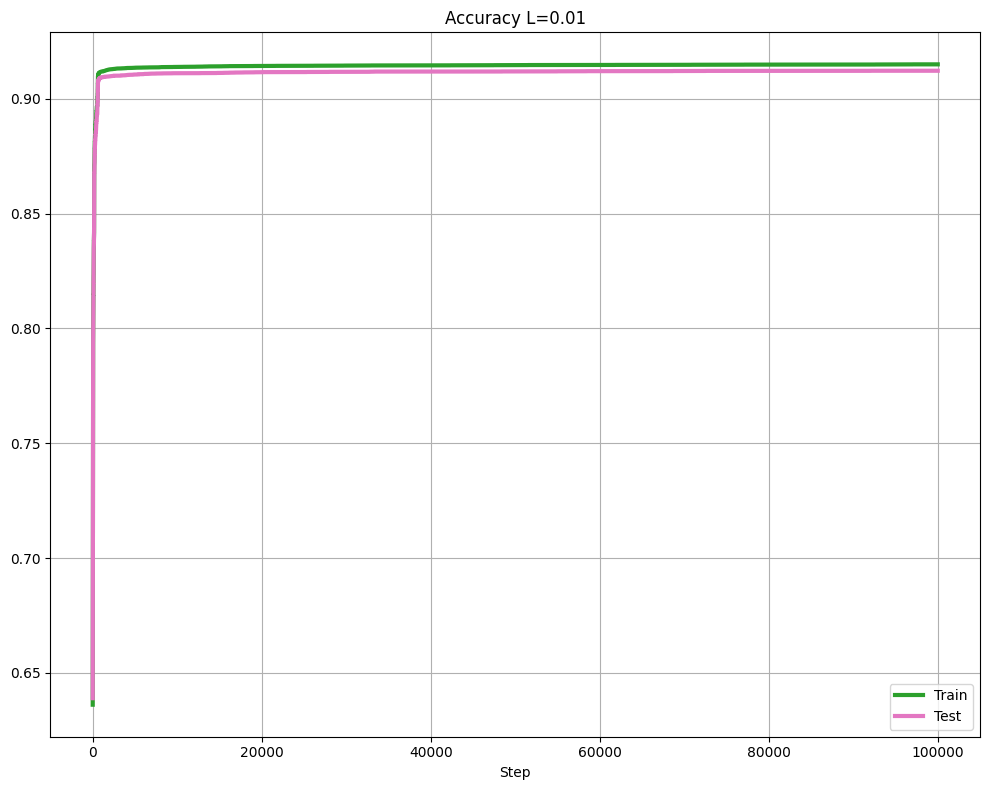

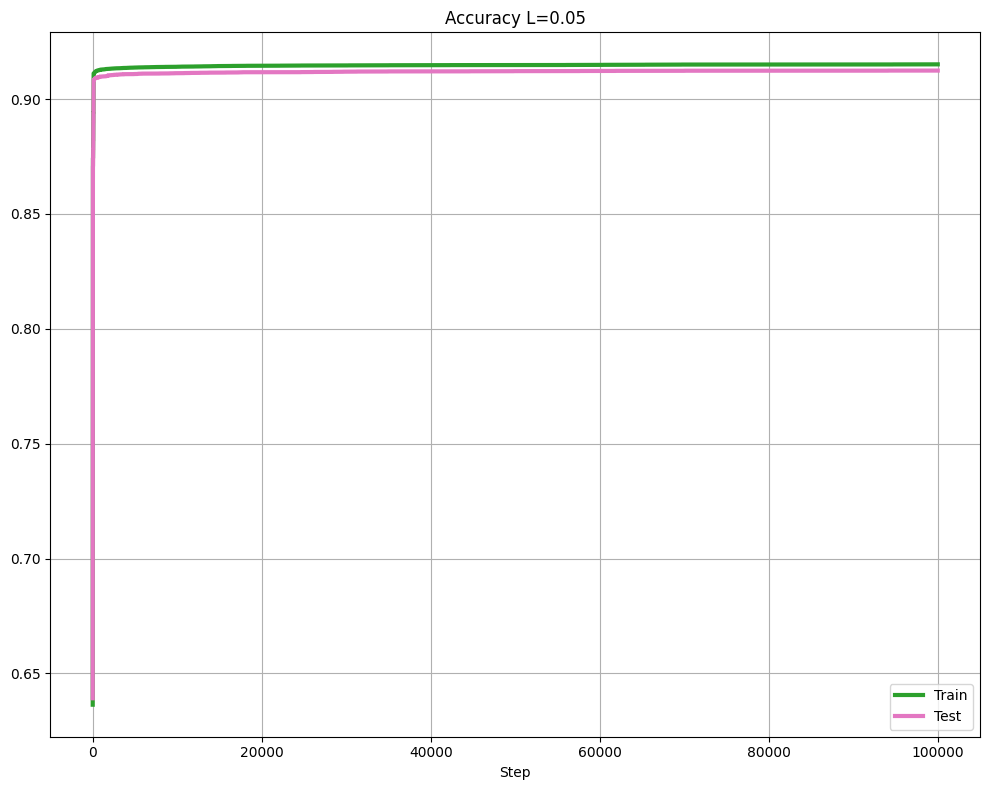

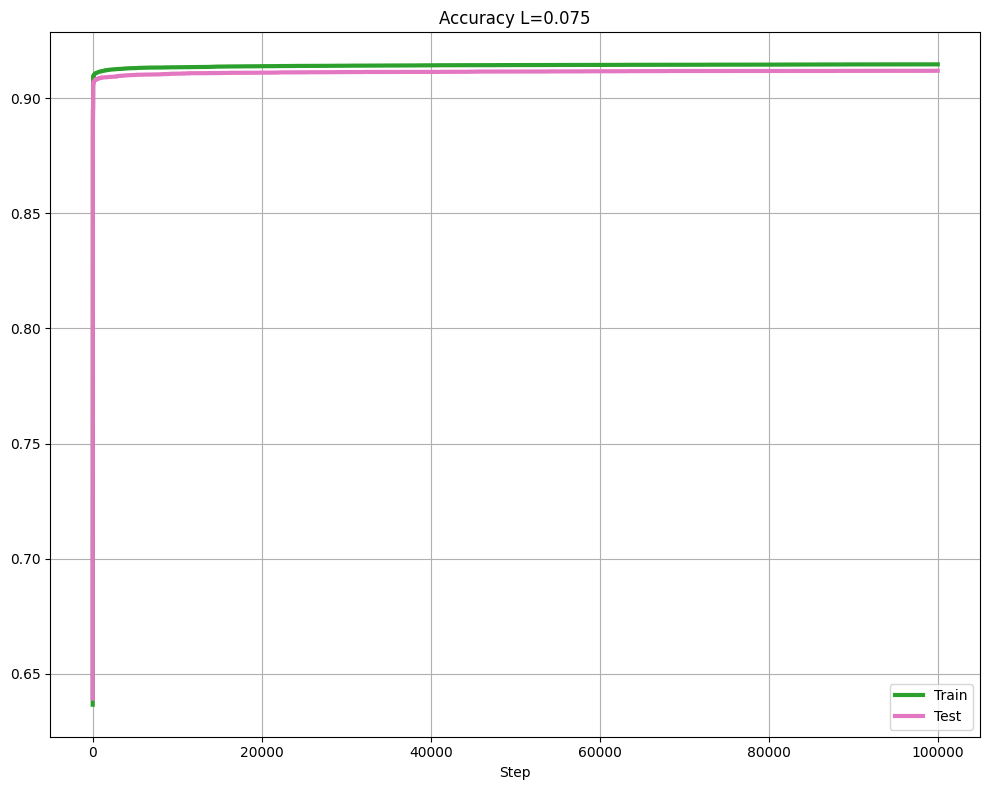

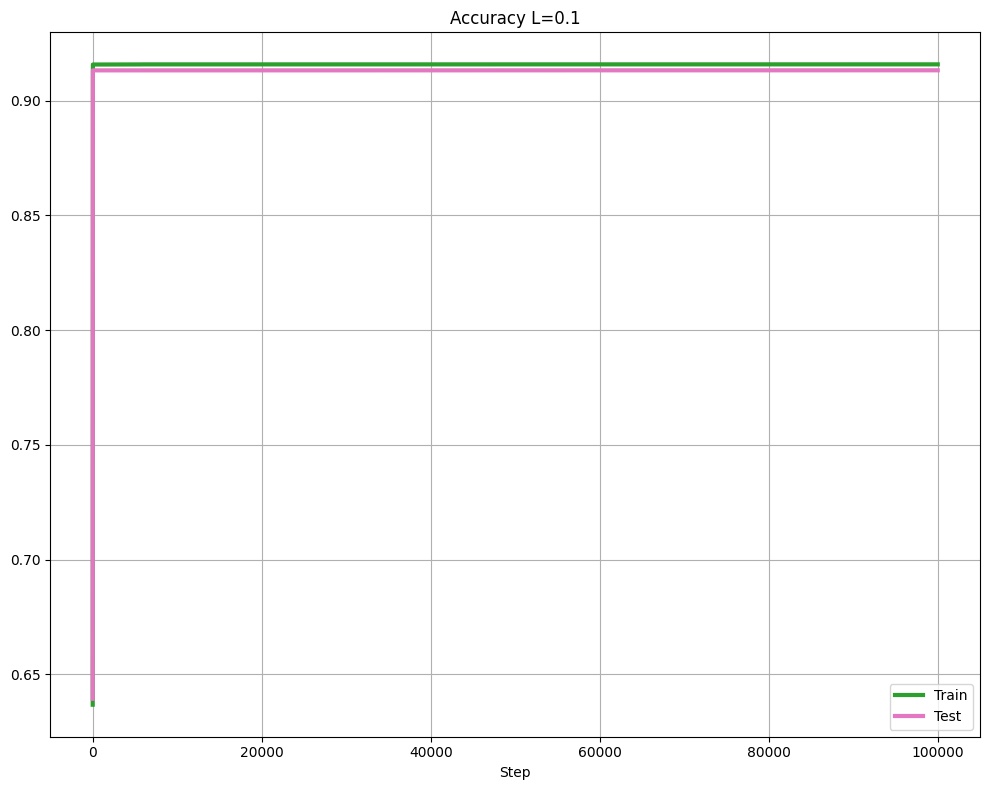

In [12]:
iters_l = (5000,10000,25000,50000,100_000)
L_l = (0.001,0.005,0.01,0.05,0.075,0.1)

for iter in iters_l:
    for L in L_l:
        redNeuronal(L=L, iteraciones = iter)
        print()